# 1. CSV Metadata Extraction 

To extract the metadata you should choose one of the 2 options: <br>
    a. Extract the Metadat by traversing through all the files. <br>
    b. Open the CSV file to use the already extracted metadata. <br>
    
Option 1 takes ~2 hours to run 

This Piece of code helps in extracting the metadat of all the CSV Files at a folder.
Taking forward Margaret's Week 1 Code. The code extracts the shape of the files and the first coloumn names. 

In [1]:
import os
import pandas as pd
import time
import glob 
import csv

## Part 1. Extract the Metadata -1 by traversing through all the files (~2 Hours)

In [2]:
path = "F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs"
all_paths = os.listdir(path)
all_paths_folder = [path +  '/' + str(x) for x in all_paths]
all_paths_folder

['F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/001',
 'F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/002']

In [3]:
path = "F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs"
all_paths = os.listdir(path)
all_paths_folder = [path +  '/' + str(x) for x in all_paths]




# Try Using glob.glob instead 
# flat_list_csv = glob.glob(path+'\*.pdf')
# flat_list_csv
all_paths_csv = []
for file_path in all_paths_folder:
    all_paths = os.listdir(file_path)
    all_paths_full = [file_path + '/' + y for y in all_paths]
    all_paths_csv.append(all_paths_full)

flat_list_csv = [item for sublist in all_paths_csv for item in sublist]

In [4]:
# example = flat_list_csv[8:16]
len(flat_list_csv)
# flat_list_csv1 = flat_list_csv[3:22]

# flat_list_csv

file = flat_list_csv[1]
file_handler = pd.read_csv(file, header = 0)
file_name = file.split('/')[-1]


In [5]:
shape_list = []
for file in flat_list_csv:
    try:
        file_handler = pd.read_csv(file, header = 0)
               
        shape = (list(file_handler.shape))
        
        file_name = file.split('/')[-1][:-4]
        shape.append(file_name)
        
        shape.append(file_handler.head(1))
        shape1 = shape.insert(0, file)
        shape_list.append(shape)
        
        
        # file_handler.close() --- Check if qwe need to close the handler or in Pandas you needn't close the handler
        #with open(x, "rb") as f:
        #reader = csv.reader(f)
        #i = reader.next()
        #rest = [row for row in reader]
        
    except:
        pass
#        shape = (0, 0, 'N/A')
#        shape1 = shape.insert(0, file)
#        shape_list.append(shape) 


In [6]:
df = pd.DataFrame(shape_list, columns =['Link', 'Row_Numbers', 'Coloumn_Numbers', 'File_Name', 'Coloumn_Names']) 

postal_series = df['Link'].str.extract('(A\d\D...)')
df.insert(1, 'Postal', postal_series)

df.head(5)

,Link,Postal,Row_Numbers,Coloumn_Numbers,File_Name,Coloumn_Names
0,F:/D&IMBU/DataScience/2019.10.07 - Environment...,A4F2Z2,6,4,01 ESA MAIN Section01to05 %2D A4F2Z2-page-20-t...,Filing Manu...
1,F:/D&IMBU/DataScience/2019.10.07 - Environment...,A4F2Z2,13,4,01 ESA MAIN Section01to05 %2D A4F2Z2-page-21-t...,Filing Manual No. Filing Requirement...
2,F:/D&IMBU/DataScience/2019.10.07 - Environment...,A4F2Z2,12,4,01 ESA MAIN Section01to05 %2D A4F2Z2-page-22-t...,Filing Manual No. Filing ...
3,F:/D&IMBU/DataScience/2019.10.07 - Environment...,A4F2Z2,15,4,01 ESA MAIN Section01to05 %2D A4F2Z2-page-23-t...,Filing Manual No. ...
4,F:/D&IMBU/DataScience/2019.10.07 - Environment...,A4F2Z2,12,4,01 ESA MAIN Section01to05 %2D A4F2Z2-page-24-t...,Filing Manual No. Filing Requirement \ 0 ...


The dataframe is saved in a locan CSV file. It is highly recommended to have a look at the csv file before going forward. 

In [7]:
os.chdir(path + " Matadata")
df.to_csv('Shape_UBC_Baseline.csv')

## Part 2. Extract the Metadata -2 by traversing through all the files (~2 Hours)

In [8]:
path = "F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs"
all_paths = os.listdir(path)
all_paths_folder = [path +  '/' + str(x) for x in all_paths]
all_paths_folder

['F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/001',
 'F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/002']

In [9]:
all_paths_csv = []
for x in all_paths_folder:
    all_paths = os.listdir(x)
    all_paths_full = [x + '/' + y for y in all_paths]
    all_paths_csv.append(all_paths_full)
len(all_paths_csv)

len(flat_list_csv)

#full path for each csv file
flat_list_csv = [item for sublist in all_paths_csv for item in sublist]  
len(flat_list_csv)

25

In [10]:
#go through each full path and grab the column names and create a new dataframe

Max_No_of_coloumns = 0
coloumnList = []
for file in flat_list_csv:
            
    file_handler = pd.read_csv(file)
    file_handler.insert(0, file, file)
           
    Col_List = file_handler.columns.tolist()
    coloumnList.append(Col_List)
    if len(Col_List) > Max_No_of_coloumns:
        Max_No_of_coloumns = len(Col_List)
    
Col_Names = ['Link']
for i in range(0,Max_No_of_coloumns-1):
    Col_Names.append('Col ' + str(i+1))
    
Col_Names

['Link', 'Col 1', 'Col 2', 'Col 3', 'Col 4', 'Col 5', 'Col 6']

In [11]:
coloumnList

[['F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/001/01 ESA MAIN Section01to05 %2D A4F2Z2-page-20-table-1.csv',
  'Filing Manual No.',
  'Filing Requirement',
  'In Application? References',
  'Not in Application? Explanation'],
 ['F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/001/01 ESA MAIN Section01to05 %2D A4F2Z2-page-21-table-1.csv',
  'Filing Manual No.',
  'Filing Requirement',
  'In Application? References',
  'Not in Application? Explanation'],
 ['F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/001/01 ESA MAIN Section01to05 %2D A4F2Z2-page-22-table-1.csv',
  'Filing Manual No.',
  'Filing Requirement',
  'In Application? References',
  'Not in Application? Explanation'],
 ['F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs/001/01 ESA MAIN Section01to05 %2D A4

In [12]:
df_coloumns = pd.DataFrame(coloumnList, columns = Col_Names) 

In [13]:
os.chdir(path + " Matadata")
df_coloumns.to_csv('coloumn_Names_UBC_Baseline.csv')

In [14]:
df_coloumns.head(6)

,Link,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6
0,F:/D&IMBU/DataScience/2019.10.07 - Environment...,Filing Manual No.,Filing Requirement,In Application? References,Not in Application? Explanation,None,None
1,F:/D&IMBU/DataScience/2019.10.07 - Environment...,Filing Manual No.,Filing Requirement,In Application? References,Not in Application? Explanation,None,None
2,F:/D&IMBU/DataScience/2019.10.07 - Environment...,Filing Manual No.,Filing Requirement,In Application? References,Not in Application? Explanation,None,None
3,F:/D&IMBU/DataScience/2019.10.07 - Environment...,Filing Manual No.,Filing Requirement,In Application? References,Not in Application? Explanation,None,None
4,F:/D&IMBU/DataScience/2019.10.07 - Environment...,Filing Manual No.,Filing Requirement,In Application? References,Not in Application? Explanation,None,None
5,F:/D&IMBU/DataScience/2019.10.07 - Environment...,Technical Component,Project Details,None,None,None,None


# 2. Open the CSV file to use the already extracted metadata

In [15]:
# df = pd.read_csv('')
# print(df.target_names.unique())
# df.Coloumn_Names.head()

# 3. Plotting the shape of the csv files 

Ref -> https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib


Read the reference to add annotations on hovering for more interesting tooltip visualizations. 
It didn't work so well for Jupyter notebook for me.

In [16]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

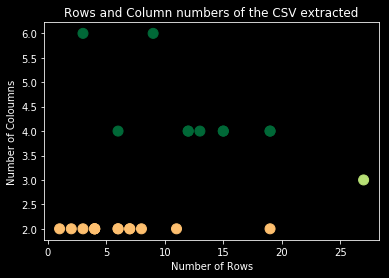

In [17]:
fig,ax = plt.subplots()

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

sc = plt.scatter(df['Row_Numbers'],df['Coloumn_Numbers'],c=df['Coloumn_Numbers'], s=100, cmap=cmap, norm=norm)
plt.xlabel('Number of Rows')
plt.ylabel('Number of Coloumns')
plt.title('Rows and Column numbers of the CSV extracted')

plt.show()

Code is continued in 2. EDA on CSV - Topic Modelling